<div style="background-color: #D6EAF8; padding: 10px; border-radius: 5px;">
  
CASE 1 - ADVECTIVE FLOW - ANALYTIC & NUMERIC

</div>



tan shock= 6.491426104755703
S1_shock= 0.024
f1_shock 0.1401666208613576


/tmp/ipykernel_410/1921563932.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  f1.append(1/(1+visc1/visc2*kr2[i]/kr1[i]))


,S1,Se,kr1,kr2,f1,vD,tangent,vD_plot
0,0.000,0.00000,0.000000,1.000000e+00,0.000000,0.000000,3.284678,6.491426
1,0.001,0.00125,0.000328,9.962547e-01,0.003285,3.771128,3.771128,6.491426
2,0.002,0.00250,0.000754,9.925187e-01,0.007542,4.486054,4.486054,6.491426
3,0.003,0.00375,0.001227,9.887921e-01,0.012257,4.872407,4.872407,6.491426
4,0.004,0.00500,0.001733,9.850749e-01,0.017287,5.150988,5.150988,6.491426
...,...,...,...,...,...,...,...,...
795,0.795,0.99375,0.992505,2.441406e-07,1.000000,0.000015,0.000015,0.000015
796,0.796,0.99500,0.994003,1.250000e-07,1.000000,0.000010,0.000010,0.000010
797,0.797,0.99625,0.995502,5.273438e-08,1.000000,0.000006,0.000006,0.000006
798,0.798,0.99750,0.997001,1.562500e-08,1.000000,0.000003,0.000003,0.000003


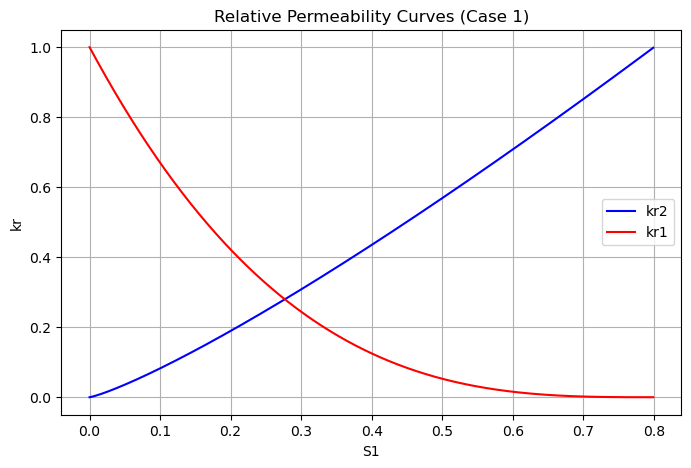

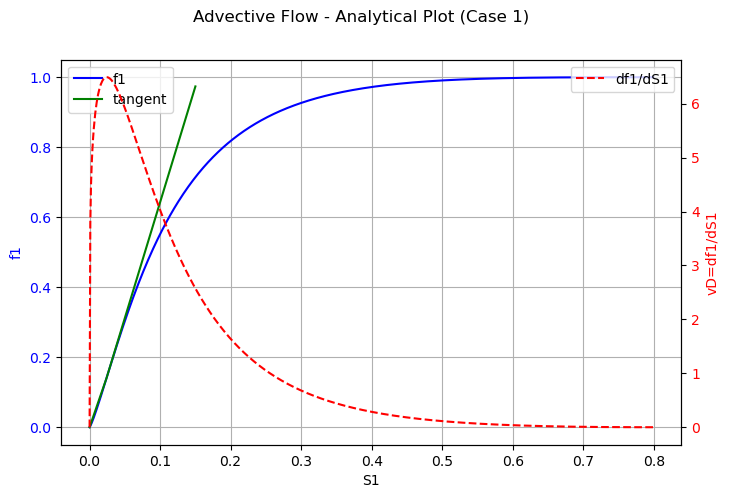

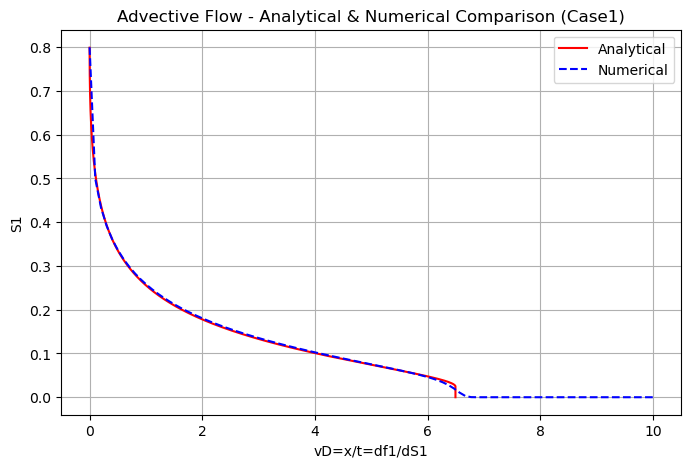

In [178]:
#ANALYTIC-----------------------------------------------------------------------------------------------------------------------

#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#parameters
visc1=0.1
visc2=1
kr1max=1
kr2max=1
a=1.2
b=3
S1i=0
S2r=0.2
delta_S1=0.001

#prepare list
S1=list(np.arange(S1i,1- S2r, delta_S1))
Se=[]
kr1=[]
kr2=[]
f1=[]
vD=[0]
vD_plot=[]

#impute list
for i in range(0,len(S1)):
    Se.append((S1[i] - S1i) / (1 - S2r - S1i))
    kr1.append(kr1max*Se[i]**a)
    kr2.append(kr2max*(1-Se[i])**b)
    f1.append(1/(1+visc1/visc2*kr2[i]/kr1[i]))
    
for j in range(1,len(S1)-1): 
    vD.append((f1[j+1]-f1[j-1])/(2*delta_S1))
vD.append(0)


#find shock
tangent = np.gradient(f1, S1)
tangent_shock = np.max(tangent)
shock_index = np.argmax(tangent)
S1_shock = S1[shock_index]
f1_shock = f1[shock_index]

tan_x=[0,S1_shock,0.15]
tan_y=[0,f1_shock,tangent_shock*0.15]


print('tan shock=',tangent_shock)
print('S1_shock=',S1_shock)
print('f1_shock',f1_shock)

#prepare plot of vD according to shock
for i in range(0,len(S1)):
    if S1[i] >S1_shock:
        vD_plot.append(vD[i])
    else:
        vD_plot.append(tangent_shock)

# prepare dataframe
df = pd.DataFrame({"S1": S1, "Se": Se,"kr1":kr1,"kr2":kr2,"f1":f1,"vD":vD,"tangent":tangent,"vD_plot":vD_plot})
display(df)

# Plot kr1 and kr2 vs S1
plt.figure(figsize=(8, 5))
plt.plot(S1, kr1, label=r'kr2', color='blue')
plt.plot(S1, kr2, label=r'kr1', color='red')
plt.xlabel('S1')
plt.ylabel('kr')
plt.title('Relative Permeability Curves (Case 1)')
plt.legend()
plt.grid()
plt.show()

# Create plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary axis (left): Plot f1(S1)
ax1.plot(S1, f1, label=r'f1', color='blue')
ax1.plot(tan_x, tan_y, label=r'tangent', color='green')
ax1.set_xlabel('S1')
ax1.set_ylabel(r'f1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Secondary axis (right): Plot vD_plot(S1)
ax2 = ax1.twinx()
ax2.plot(S1, vD, label=r'df1/dS1', color='red', linestyle='--')
ax2.set_ylabel(r'vD=df1/dS1', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle('Advective Flow - Analytical Plot (Case 1)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


#NUMERIC------------------------------------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Define numerical grid and parameters
dx = 0.01  # Spatial step size (m)
dt = 0.001  # Time step size (s)
Nx = 100   # Number of spatial points
Nt = 100   # Number of time steps
L = Nx*dx # Total domain length (m)
T = Nt*dt  # Total simulation time (s)


# Define spatial grid
x = np.linspace(0, L, Nx)  # Spatial positions

# Define functions for relative permeability
def kr1(S1):
    return np.clip(kr1max * ((S1 - S1i) / (1 - S1i - S2r))**a, 0, kr1max)

def kr2(S1):
    return np.clip(kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r))**b, 0, kr2max)

# Function for fractional flow
def fw(S1):
    kr1_val = kr1(S1)
    kr2_val = kr2(S1)
    return (kr1_val / visc1) / ((kr1_val / visc1) + (kr2_val / visc2))

# Initialize saturation array
S1_num = np.zeros((Nt, Nx))  
S1_num[0, :] = S1i  # Set initial saturation

# Apply boundary condition: Injected saturation at x = 0
S1_inj = 1 - S2r  # Injected CO2 saturation

# Time stepping loop using upwind scheme
for n in range(1, Nt):
    #S1_num[n] = S1[n-1].copy()
    S1_num[n, 0] = S1_inj  # Injected saturation at x = 0
    for i in range(1, Nx):  # Upwind scheme
        S1_num[n, i] = S1_num[n-1, i] - (dt/dx) * (fw(S1_num[n-1, i]) - fw(S1_num[n-1, i-1]))

# Compute dimensionless distance v_D = x / T
vD_num = x / T

# Plot S1 vs vD_plot and S1_num vs vD_num
plt.figure(figsize=(8, 5))
plt.plot(vD_plot,S1, color='red', label=r'Analytical')
plt.plot(vD_num, S1_num[-1], color='blue', linestyle='dashed', label=r'Numerical')

# Labels and Title
plt.ylabel(r'S1')
plt.xlabel(r'vD=x/t=df1/dS1')
plt.title('Advective Flow - Analytical & Numerical Comparison (Case1)')
plt.legend()
plt.grid()



<div style="background-color: #D6EAF8; padding: 10px; border-radius: 5px;">
  
CASE 2 - ADVECTIVE FLOW - ANALYTIC & NUMERIC

</div>



300
tan shock= 3.333333333333333
S1_shock= 0.4990000000000003
f1_shock= 0.987164387310601


/tmp/ipykernel_410/3187443478.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  f1.append(1 / (1 + (visc1 / visc2) * (kr2[i] / kr1[i])))


,S1,Se,kr1,kr2,f1,vD,tangent,vD_plot
0,0.200,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.333333
1,0.201,0.003333,1.851852e-11,0.995004,1.861150e-12,1.496421e-08,1.861150e-09,3.333333
2,0.202,0.006667,2.962963e-10,0.990017,2.992841e-11,7.520865e-08,1.496421e-08,3.333333
3,0.203,0.010000,1.500000e-09,0.985038,1.522785e-10,2.268938e-07,5.075949e-08,3.333333
4,0.204,0.013333,4.740741e-09,0.980067,4.837161e-10,5.173394e-07,1.209290e-07,3.333333
...,...,...,...,...,...,...,...,...
295,0.495,0.983333,1.402472e-01,0.002152,8.669877e-01,3.600737e+01,2.938941e+00,3.333333
296,0.496,0.986667,1.421586e-01,0.001540,9.022814e-01,3.405745e+01,3.048248e+00,3.333333
297,0.497,0.990000,1.440894e-01,0.001000,9.351026e-01,3.089256e+01,3.148494e+00,3.333333
298,0.498,0.993333,1.460398e-01,0.000544,9.640666e-01,2.603089e+01,3.235123e+00,3.333333


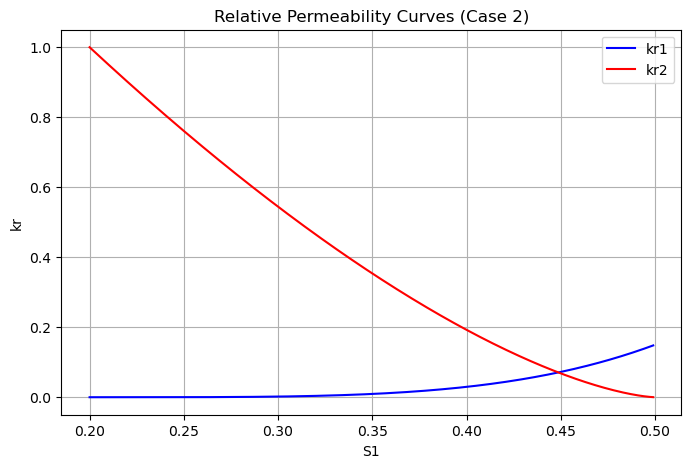

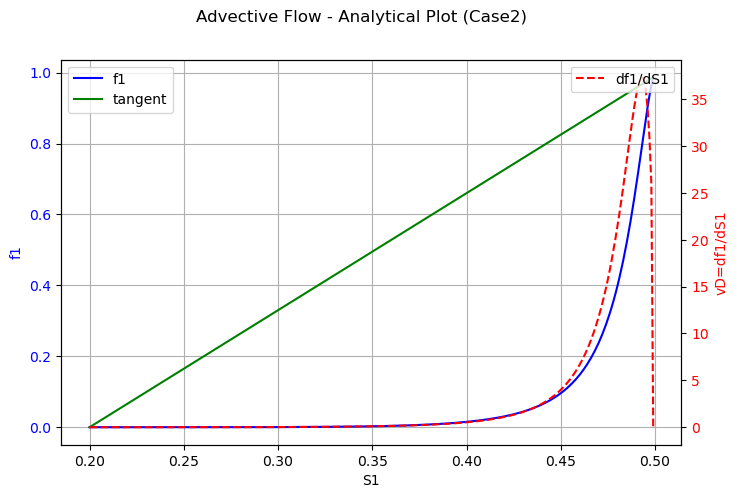

NaN in S1_num: 0


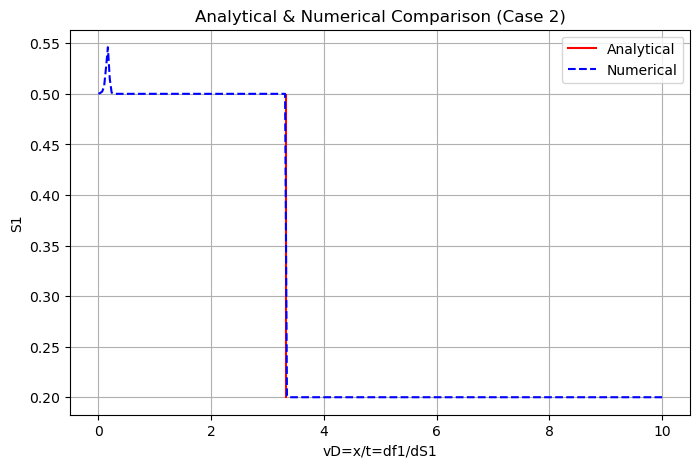

In [179]:
#ANALYTIC-----------------------------------------------------------------------------------------------------------------------

# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Case 2 Parameters (Water-CO₂ in Mixed-Wet System)
visc1 = 1     # Water viscosity (mPa.s)
visc2 = 0.1     # CO₂ viscosity (mPa.s)
kr1max = 0.15
kr2max = 1
a = 4          # Corey exponent for Water
b = 1.5          # Corey exponent for CO₂
S1i = 0.2
S2r = 0.5
delta_S1 = 0.001

# Prepare lists
S1 = list(np.arange(S1i, 1 - S2r, delta_S1))
Se = []
kr1 = []
kr2 = []
f1 = []
vD = [0]
vD_plot = []

# Compute values
for i in range(0, len(S1)):
    Se.append((S1[i] - S1i) / (1 - S2r - S1i))
    kr1.append(kr1max * Se[i] ** a)
    kr2.append(kr2max * (1 - Se[i]) ** b)
    f1.append(1 / (1 + (visc1 / visc2) * (kr2[i] / kr1[i])))

for j in range(1, len(S1) - 1): 
    vD.append((f1[j+1] - f1[j-1]) / (2 * delta_S1))
vD.append(0)

print(len(S1))

# Find shock
tangent = [0]
for j in range(1, len(S1)): 
    tangent.append(f1[j]/(S1[j]-S1i))
#tangent_shock = np.max(tangent)
tangent_shock=1/(1-S1i-S2r)
shock_index = np.argmax(tangent)
S1_shock = S1[shock_index]
f1_shock = f1[shock_index]

tan_x=[S1i,S1_shock]
tan_y=[0,f1_shock]

print('tan shock=', tangent_shock)
print('S1_shock=', S1_shock)
print('f1_shock=', f1_shock)

# Prepare plot of vD according to shock
for i in range(0, len(S1)):
    if S1[i] > S1_shock:
        vD_plot.append(vD[i])
    else:
        vD_plot.append(tangent_shock)

# Prepare dataframe
df = pd.DataFrame({"S1": S1, "Se": Se, "kr1": kr1, "kr2": kr2, "f1": f1, "vD": vD, "tangent": tangent, "vD_plot": vD_plot})
display(df)

# Plot kr1 and kr2 vs S1
plt.figure(figsize=(8, 5))
plt.plot(S1, kr1, label=r'kr1', color='blue')
plt.plot(S1, kr2, label=r'kr2', color='red')
plt.xlabel('S1')
plt.ylabel('kr')
plt.title('Relative Permeability Curves (Case 2)')
plt.legend()
plt.grid()
plt.show()

# Create plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary axis (left): Plot f1(S1)
ax1.plot(S1, f1, label=r'f1', color='blue')
ax1.plot(tan_x, tan_y, label=r'tangent', color='green')
ax1.set_xlabel('S1')
ax1.set_ylabel(r'f1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Secondary axis (right): Plot vD_plot(S1)
ax2 = ax1.twinx()
ax2.plot(S1, vD, label=r'df1/dS1', color='red', linestyle='--')
ax2.set_ylabel(r'vD=df1/dS1', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle('Advective Flow - Analytical Plot (Case2)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



#NUMERIC------------------------------------------------------------------------------------------------------------------------

# Numerical Simulation Parameters
dx = 0.01  
dt = 0.001  
Nx = 300
Nt = 300
L = Nx * dx  
T = Nt * dt  
x = np.linspace(0, L, Nx)  

# Case Parameters (Modify for Different Cases)
visc1 = 1     # Water viscosity (mPa.s)
visc2 = 0.1   # CO₂ viscosity (mPa.s)
kr1max = 0.15
kr2max = 1
a = 4         # Corey exponent for Water
b = 1.5       # Corey exponent for CO₂
S1i = 0.2
S2r = 0.5

# Define safe relative permeability functions
def kr1(S1):
    S1 = np.clip(S1, S1i, 1 - S2r)  # Ensure S1 is within physical limits
    return np.clip(kr1max * ((S1 - S1i) / (1 - S1i - S2r ))**a, 0, kr1max)

def kr2(S1):
    S1 = np.clip(S1, S1i, 1 - S2r)  # Ensure S1 is within physical limits
    return np.clip(kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r ))**b, 0, kr2max)

# Function for fractional flow (avoid division by zero)
def fw(S1):
    kr1_val = kr1(S1)
    kr2_val = kr2(S1)
    denominator = (kr1_val / visc1) + (kr2_val / visc2)
    return np.where(denominator != 0, (kr1_val / visc1) / denominator, 0)  # Avoid division by zero

# Initialize saturation array
S1_num = np.zeros((Nt, Nx))  
S1_num[0, :] = S1i  # Set initial saturation

# Apply boundary condition: Injected saturation at x = 0
S1_inj = 1 - S2r  

# Time stepping loop using upwind scheme
for n in range(1, Nt):
    #S1_num[n] = S1_num[n-1].copy()
    S1_num[n, 0] = S1_inj  # Injected saturation at x = 0
    for i in range(1, Nx):  
        fw_diff = fw(S1_num[n-1, i]) - fw(S1_num[n-1, i-1])
        S1_num[n, i] = S1_num[n-1, i] - (dt/dx) * fw_diff

# Compute dimensionless distance v_D = x / T
vD_num = x / T

# Check if NaN values still exist
print("NaN in S1_num:", np.isnan(S1_num).sum())  # Should print 0 if fixed

# Plot S1 vs vD_plot and S1_num vs vD_num
plt.figure(figsize=(8, 5))
plt.plot(vD_plot, S1, color='red', label=r'Analytical')
plt.plot(vD_num, S1_num[-1], color='blue', linestyle='dashed', label=r'Numerical')

# Labels and Title
plt.ylabel('S1')
plt.xlabel(r'vD=x/t=df1/dS1')
plt.title('Analytical & Numerical Comparison (Case 2)')
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #D6EAF8; padding: 10px; border-radius: 5px;">
  
CASE 3 - ADVECTIVE FLOW - ANALYTIC & NUMERIC

</div>



650
tan shock= 1.6839448477941135
S1_shock= 0.7750000000000006
f1_shock= 0.9682682874816163


/tmp/ipykernel_410/1646191769.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  f1.append(1 / (1 + (visc1 / visc2) * (kr2[i] / kr1[i])))


,S1,Se,kr1,kr2,f1,vD,tangent,vD_plot
0,0.200,0.000000,0.000000e+00,8.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.683945
1,0.201,0.001538,1.255316e-23,7.963134e-01,3.941025e-24,5.067902e-19,3.941025e-21,1.683945
2,0.202,0.003077,3.213610e-21,7.926381e-01,1.013580e-21,1.304683e-17,5.067902e-19,1.683945
3,0.203,0.004615,8.236130e-20,7.889741e-01,2.609759e-20,1.304402e-16,8.699197e-18,1.683945
4,0.204,0.006154,8.226840e-19,7.853215e-01,2.618940e-19,7.710921e-16,6.547351e-17,1.683945
...,...,...,...,...,...,...,...,...
645,0.845,0.992308,3.760372e-01,3.641329e-07,9.999961e-01,2.409001e-03,1.550382e+00,0.002409
646,0.846,0.993846,3.807267e-01,1.864360e-07,9.999980e-01,1.528588e-03,1.547985e+00,0.001529
647,0.847,0.995385,3.854672e-01,7.865271e-08,9.999992e-01,8.599368e-04,1.545594e+00,0.000860
648,0.848,0.996923,3.902592e-01,2.330451e-08,9.999998e-01,3.933442e-04,1.543210e+00,0.000393


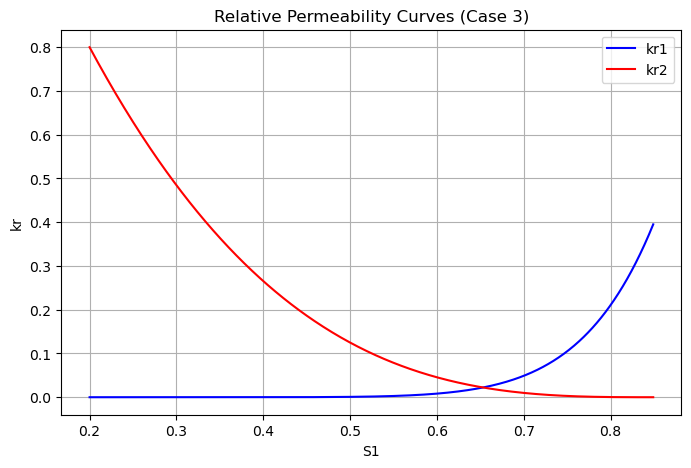

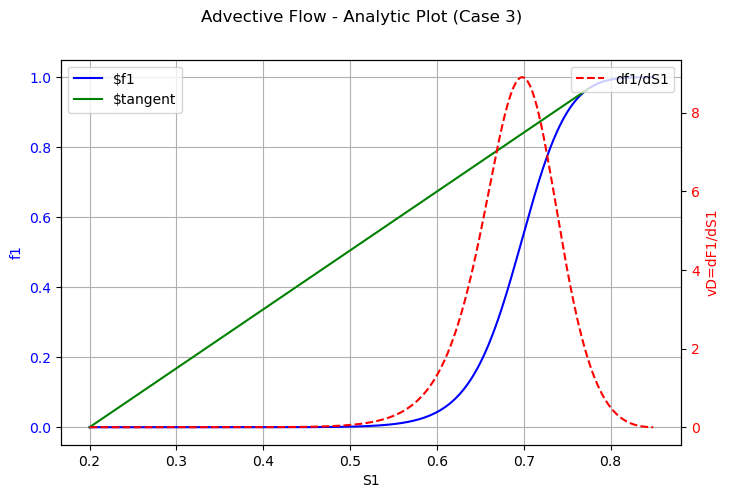

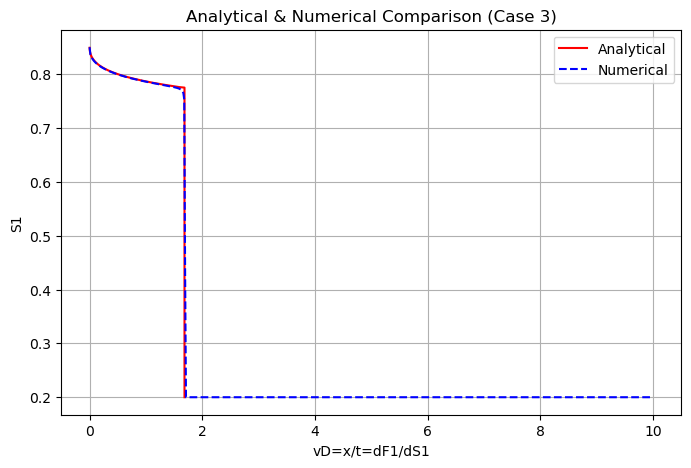

In [180]:
#ANALYTIC-----------------------------------------------------------------------------------------------------------------------

# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Case 3 Parameters (Water-CO₂ in Mixed-Wet System)
visc1 = 0.4     # Water viscosity (mPa.s)
visc2 = 0.1     # CO₂ viscosity (mPa.s)
kr1max = 0.4
kr2max = 0.8
a = 8          # Corey exponent for Water
b = 3          # Corey exponent for CO₂
S1i = 0.2
S2r = 0.15
delta_S1 = 0.001

# Prepare lists
S1 = list(np.arange(S1i, 1 - S2r, delta_S1))
Se = []
kr1 = []
kr2 = []
f1 = []
vD = [0]
vD_plot = []

# Compute values
for i in range(0, len(S1)):
    Se.append((S1[i] - S1i) / (1 - S2r - S1i))
    kr1.append(kr1max * Se[i] ** a)
    kr2.append(kr2max * (1 - Se[i]) ** b)
    f1.append(1 / (1 + (visc1 / visc2) * (kr2[i] / kr1[i])))

for j in range(1, len(S1) - 1): 
    vD.append((f1[j+1] - f1[j-1]) / (2 * delta_S1))
vD.append(0)

print(len(S1))

# Find shock
tangent = [0]
for j in range(1, len(S1)): 
    tangent.append(f1[j]/(S1[j]-S1i))
tangent_shock = np.max(tangent)
shock_index = np.argmax(tangent)
S1_shock = S1[shock_index]
f1_shock = f1[shock_index]

tan_x=[S1i,S1_shock]
tan_y=[0,f1_shock]

print('tan shock=', tangent_shock)
print('S1_shock=', S1_shock)
print('f1_shock=', f1_shock)

# Prepare plot of vD according to shock
for i in range(0, len(S1)):
    if S1[i] > S1_shock:
        vD_plot.append(vD[i])
    else:
        vD_plot.append(tangent_shock)

# Prepare dataframe
df = pd.DataFrame({"S1": S1, "Se": Se, "kr1": kr1, "kr2": kr2, "f1": f1, "vD": vD, "tangent": tangent, "vD_plot": vD_plot})
display(df)

# Plot kr1 and kr2 vs S1
plt.figure(figsize=(8, 5))
plt.plot(S1, kr1, label=r'kr1', color='blue')
plt.plot(S1, kr2, label=r'kr2', color='red')
plt.xlabel('S1')
plt.ylabel('kr')
plt.title('Relative Permeability Curves (Case 3)')
plt.legend()
plt.grid()
plt.show()

# Create plot with dual axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Primary axis (left): Plot f1(S1)
ax1.plot(S1, f1, label=r'$f1', color='blue')
ax1.plot(tan_x, tan_y, label=r'$tangent', color='green')
ax1.set_xlabel('S1')
ax1.set_ylabel(r'f1', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Secondary axis (right): Plot vD_plot(S1)
ax2 = ax1.twinx()
ax2.plot(S1, vD, label=r'df1/dS1', color='red', linestyle='--')
ax2.set_ylabel(r'vD=dF1/dS1', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle('Advective Flow - Analytic Plot (Case 3)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#NUMERIC------------------------------------------------------------------------------------------------------------------------

# Define numerical grid
dx = 0.01  
dt = 0.001  
Nx = 650 
Nt = 650 
L = Nx * dx  
T = Nt * dt  
x = np.linspace(0, L, Nx)  

# Define functions for relative permeability
def kr1(S1):
    return np.clip(kr1max * ((S1 - S1i) / (1 - S1i - S2r))**a, 0, kr1max)

def kr2(S1):
    return np.clip(kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r))**b, 0, kr2max)

# Function for fractional flow
def fw(S1):
    kr1_val = kr1(S1)
    kr2_val = kr2(S1)
    return (kr1_val / visc1) / ((kr1_val / visc1) + (kr2_val / visc2))

# Initialize saturation array
S1_num = np.zeros((Nt, Nx))  
S1_num[0, :] = S1i  

# Apply boundary condition: Injected saturation at x = 0
S1_inj = 1 - S2r  

# Time stepping loop using upwind scheme
for n in range(1, Nt):
    #S1_num[n] = S1_num[n-1].copy()
    S1_num[n, 0] = S1_inj  
    for i in range(1, Nx):  
        S1_num[n, i] = S1_num[n-1, i] - (dt/dx) * (fw(S1_num[n-1, i]) - fw(S1_num[n-1, i-1]))

# Compute dimensionless distance v_D = x / T
vD_num = x / T

# Plot S1 vs vD_plot and S1_num vs vD_num
plt.figure(figsize=(8, 5))
plt.plot(vD_plot, S1, color='red', label=r'Analytical')
plt.plot(vD_num, S1_num[-1], color='blue', linestyle='dashed', label=r'Numerical')

# Labels and Title
plt.ylabel('S1')
plt.xlabel(r'vD=x/t=dF1/dS1')
plt.title('Analytical & Numerical Comparison (Case 3)')
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #D6EAF8; padding: 10px; border-radius: 5px;">
  
CASE 2&3 - IMBIBITION FLOW - ANALYTIC

</div>


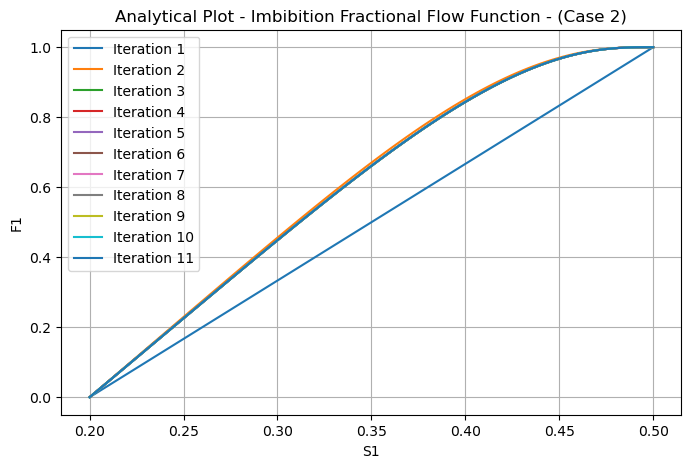

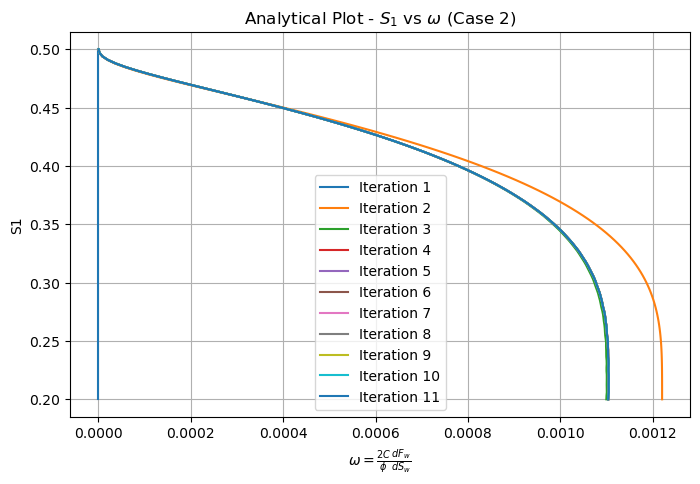

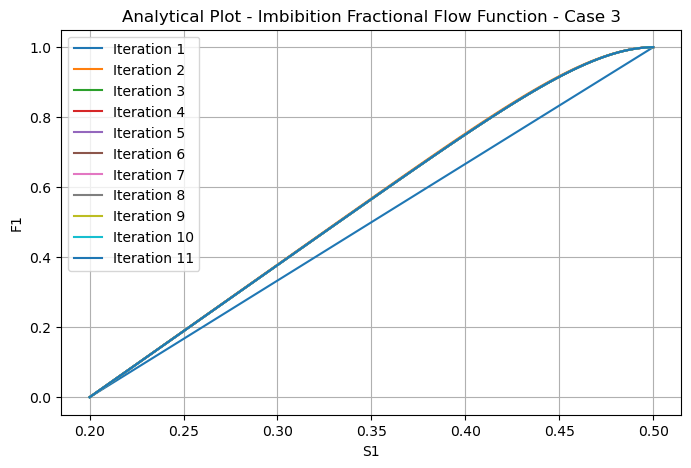

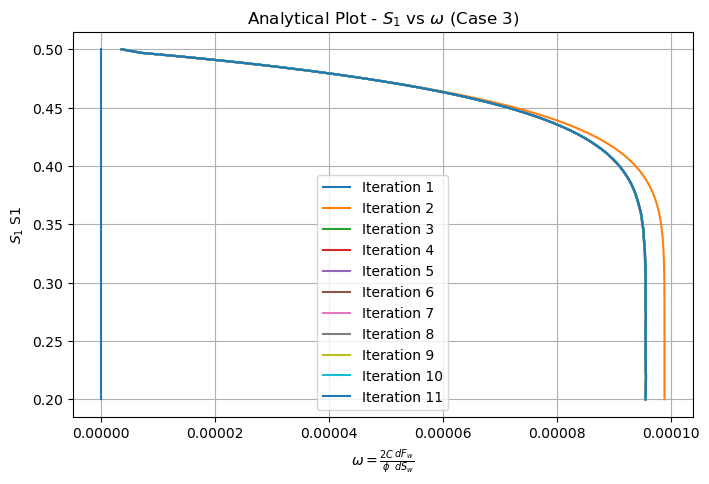

In [203]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d


# --------------------- Capillary Pressure Gradient Calculation ---------------------

def dPc(S1, Pc_max, c, S1i, Si_star):
    """ Compute the capillary pressure gradient dPc/dS1 """
    denominator = (Si_star / S1i) ** (-c) - 1
    return (Pc_max * c * (S1 / S1i) ** (-c - 1)) / denominator

# --------------------- Define Function for Analytical Solution ---------------------

def analytical_solution_iterative(S1i, Si_star, S2r,K, kr1max, kr2max, a, b, phi, Pc_max, visc1,visc2,c, max_iter=10):
    """
    Compute the analytical solution using iterative integral approach.
    Store F1(S1) at each iteration to observe convergence.
    """
    # Define saturation range
    S1 = np.linspace(S1i, Si_star, 100)

    # Define D(S1) function
    def D(S1):
        kr1 = kr1max * ((S1 - S1i) / (1 - S1i - S2r)) ** a
        kr2 = kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r)) ** b
        return - (kr1/visc1 * kr2/visc2) / (kr1/visc1 + kr2/visc2)*K* dPc(S1, Pc_max, c, S1i, Si_star)

    # Initial guess for F1(S1)
    F1_old = (S1 - S1i) / (Si_star - S1i)
    
    # Store iterations
    iteration_results = [F1_old.copy()]
    iteration_result=[0]
    
    
    # Iterative integral solution
    for iteration in range(max_iter):
        integral_c2, _ = quad(lambda beta: (beta - S1i) * D(beta) / np.interp(beta, S1, F1_old), S1i, Si_star)
        c2 = (phi / 2) * integral_c2

        # Compute updated F1(S1)
        F1_new = []
        
        for S1_val in S1:
            integral_F1, _ = quad(lambda beta: (beta - S1_val) * D(beta) / np.interp(beta, S1, F1_old), S1_val, Si_star)
            F1_new.append(1 - (phi / (2 * c2)) * integral_F1)
        
        F1_new = np.array(F1_new)
        iteration_results.append(F1_new.copy())

        F1_old = F1_new

        
        iteration_result.append(c2)
        
        
    return S1, iteration_results, iteration_result

# --------------------- Run Simulation for Case 2 ---------------------

# Case 2 Parameters (Water displacing Hydrogen)
params_case_2 = {
    "K":10**-13, "phi": 0.25, "kr1max": 0.15, "kr2max": 1.0, "a": 4, "b": 1.5,
    "S1i": 0.2, "Si_star": 0.5, "S2r": 0.5, "Pc_max": 100000, "c": 0.3,"visc1":0.001, "visc2":0.0001
}

# Compute iterative solutions
S1_case_2, F1_iterations_case_2, C2_iteration_case_2 = analytical_solution_iterative(**params_case_2)

# --------------------- Plot Iterations for Case 2 ---------------------

def plot_iterations(S1, iterations, case_name):
    plt.figure(figsize=(8, 5))
    for i, F1 in enumerate(iterations):
        plt.plot(S1, F1, label=f'Iteration {i+1}')
    
    plt.xlabel("S1")
    plt.ylabel("F1")
    plt.title(f"Analytical Plot - Imbibition Fractional Flow Function - {case_name}")
    plt.legend()
    plt.grid()
    plt.show()

# Plot iterations for Case 2 (Water-Hydrogen)
plot_iterations(S1_case_2, F1_iterations_case_2, "(Case 2)")

# --------------------- Compute and Plot S1 vs. Omega ---------------------

def compute_omega(S1, F1, phi, C):
    dF_dS = np.gradient(F1, S1)  # Compute dFw/dSw numerically
    return (2 * C / phi) * dF_dS  # Compute omega

# Plot S1 vs omega for Case 2
plt.figure(figsize=(8, 5))
for i, F1_iter in enumerate(F1_iterations_case_2):
    omega_iter = compute_omega(S1_case_2, F1_iter, params_case_2["phi"],np.sqrt(C2_iteration_case_2[i]))
    
    plt.plot(omega_iter, S1_case_2, label=f'Iteration {i+1}')
    
plt.xlabel(r'$\omega = \frac{2C}{\phi} \frac{dF_w}{dS_w}$')
plt.ylabel(r'S1')
plt.title(r'Analytical Plot - $S_1$ vs $\omega$ (Case 2)')
plt.legend()
plt.grid()
plt.show()

# --------------------- Run Simulation for Case 3 ---------------------

# Case 3 Parameters (Water displacing CO₂)
params_case_3 = {
    "phi": 0.25,"K":10**-13, "kr1max": 0.4, "kr2max": 0.8, "a": 8, "b": 3,
    "S1i": 0.2, "Si_star": 0.5, "S2r": 0.15, "Pc_max": 100000, "c": 0.3,"visc1":0.0004, "visc2":0.0001
}

# Compute iterative solutions
S1_case_3, F1_iterations_case_3,C2_iteration_case_3 = analytical_solution_iterative(**params_case_3)

# --------------------- Plot Iterations for Case 3 ---------------------

# Plot iterations for Case 3 (Water-CO₂)
plot_iterations(S1_case_3, F1_iterations_case_3, "Case 3")

# --------------------- Compute and Plot S1 vs. Omega ---------------------

# Plot S1 vs omega for Case 3
plt.figure(figsize=(8, 5))
for i, F1_iter in enumerate(F1_iterations_case_3):
    omega_iter = compute_omega(S1_case_3, F1_iter, params_case_3["phi"], np.sqrt(C2_iteration_case_3[i]))
    
    plt.plot(omega_iter, S1_case_3, label=f'Iteration {i+1}')
    
plt.xlabel(r'$\omega = \frac{2C}{\phi} \frac{dF_w}{dS_w}$')
plt.ylabel(r'$S_1$ S1')
plt.title(r'Analytical Plot - $S_1$ vs $\omega$ (Case 3)')
plt.legend()
plt.grid()
plt.show()



<div style="background-color: #D6EAF8; padding: 10px; border-radius: 5px;">
  
CASE 2 - IMBIBITION FLOW - NUMERIC

</div>

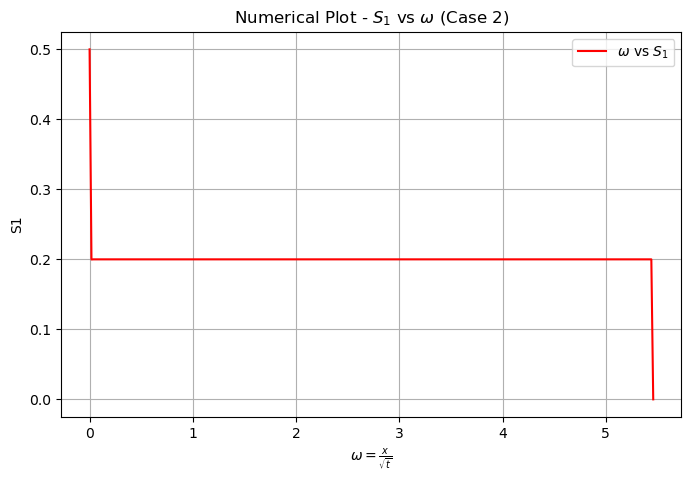

In [204]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# --------------------- Define Parameters for Case 2 ---------------------

# Grid and time step parameters
dx = 0.01   # Spatial step size (m)
dt = 0.001 # Time step size (s)
Nx = 300    # Number of spatial points
Nt = 300    # Number of time steps
phi = 0.25  # Porosity
K = 10**-13   # Absolute permeability (m^2)
Pc_max = 100000  # Maximum capillary pressure (Pa)
c = 0.3  # Capillary pressure exponent


# Saturation and permeability parameters
kr1max = 0.15  # Max relative permeability of Water
kr2max = 1.0   # Max relative permeability of Hydrogen
visc1=0.001
visc2=0.0001
a = 4          # Corey exponent for Water
b = 1.5        # Corey exponent for Hydrogen
S1i = 0.2      # Initial water saturation
Si_star = 0.5  # Irreducible water saturation
S2r = 0.5      # Residual hydrogen saturation
#lambda_w = kr1max/visc1 # Water mobility ratio
#lambda_o = kr2max/visc2 # Hydrogen mobility ratio
#lambda_t = lambda_w + lambda_o  # Total mobility

# --------------------- Define Functions ---------------------

def kr1(S1):
    S1 = np.clip(S1, S1i, 1 - S2r)  # Ensure S1 is within physical limits
    return np.clip(kr1max * ((S1 - S1i) / (1 - S1i - S2r ))**a, 0, kr1max)

def kr2(S1):
    S1 = np.clip(S1, S1i, 1 - S2r)  # Ensure S1 is within physical limits
    return np.clip(kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r ))**b, 0, kr2max)


# Effective saturation
#def Se(S1):
#    return (S1 - S1i) / (1 - S1i - S2r)

# Relative permeability functions
#def kr1(S1):
#    return kr1max * (Se(S1) ** a)

#def kr2(S1):
#    return kr2max * ((1 - Se(S1)) ** b)

# Capillary pressure function and its gradient
def Pc(S1):
    return Pc_max * (((Si_star / S1i) ** -c - (S1 / S1i) ** -c) / ((Si_star / S1i) ** -c - 1))

def dPc_dS(S1):
    return (Pc_max * c * (S1 / S1i) ** (-c - 1)) / ((Si_star / S1i) ** (-c) - 1)

# Diffusion function D(S1) based on capillary pressure gradient
def D(S1):
    
    return -K * (kr1(S1)/visc1 * kr2(S1)/visc2 )/ (kr1(S1)/visc1 + kr2(S1)/visc2) * dPc_dS(S1)

# Function to compute omega (dimensionless speed)
#def compute_omega(S1_values, phi, C):
    #dF_dS = np.gradient(S1_values) / dx  # Compute dFw/dSw numerically
    #return (2 * C / phi) * dF_dS  # Compute omega

# --------------------- Initialize Grid and Boundary Conditions ---------------------

# Define spatial grid
x = np.linspace(0, (Nx - 1) * dx, Nx)

# Initialize saturation array
S1_num = np.zeros((Nt, Nx))
S1_num[0, :] = S1i  # Set initial saturation
S1_num[:, 0] = Si_star  # Injected water saturation at x = 0 (boundary condition)

# --------------------- Solve Using Finite Difference Method ---------------------


for n in range(0, Nt - 1):  # Time loop
    #S1_num[n+1] = S1_num[n].copy()
    S1_num[:,0]=Si_star
    for i in range(1, Nx - 1):  # Space loop
        S_minus = (S1_num[n, i-1] + S1_num[n, i]) / 2  # Intermediate S-
        S_plus = (S1_num[n, i+1] + S1_num[n, i]) / 2  # Intermediate S+

        S1_num[n+1, i] = S1_num[n, i] + (dt / (phi * dx**2)) * (
            D(S_minus) * (S1_num[n, i] - S1_num[n, i-1]) -
            D(S_plus) * (S1_num[n, i+1] - S1_num[n, i])
        )

# Compute omega
#C = np.sqrt(K / phi)  # Scaling factor (approximation)
#omega_values = compute_omega(S1_num[-1], phi, C)
omega_values = x/np.sqrt(Nt*dt)

# --------------------- Plot S1 vs Omega ---------------------

plt.figure(figsize=(8, 5))
plt.plot(omega_values, S1_num[-1], label=r'$\omega$ vs $S_1$', color='red')
plt.xlabel(r'$\omega = \frac{x}{\sqrt{t}}$')
plt.ylabel(r'S1')
plt.title(r'Numerical Plot - $S_1$ vs $\omega$ (Case 2)')
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #D6EAF8; padding: 10px; border-radius: 5px;">
  
CASE 3 - IMBIBITION FLOW - NUMERIC

</div>

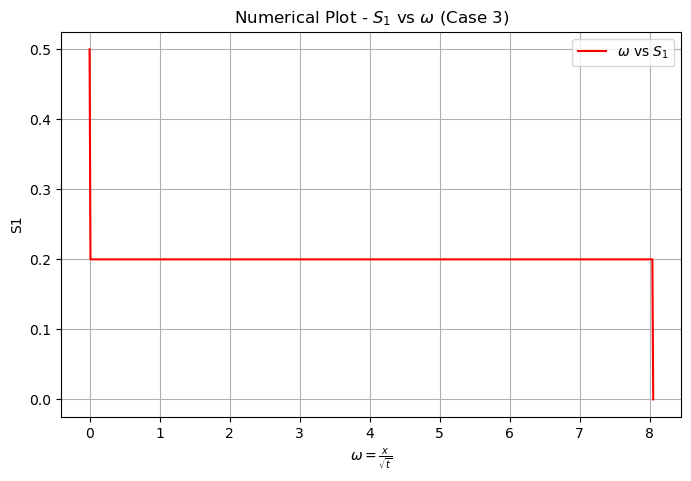

In [205]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# --------------------- Define Parameters for Case 3 ---------------------

# Grid and time step parameters
dx = 0.01   # Spatial step size (m)
dt = 0.001    # Number of spatial points
Nx = 650 # Number of spatial points
Nt = 650    # Number of time steps
phi = 0.25  # Porosity
K = 10**-13   # Absolute permeability (m^2)
Pc_max = 100000  # Maximum capillary pressure (Pa)
c = 0.3  # Capillary pressure exponent

# Saturation and permeability parameters
kr1max = 0.4  # Max relative permeability of Water
kr2max = 0.8  # Max relative permeability of CO₂
visc1 = 0.0004   # Water viscosity (mPa.s)
visc2 = 0.0001   # CO₂ viscosity (mPa.s)
a = 8          # Corey exponent for Water
b = 3          # Corey exponent for CO₂
S1i = 0.2      # Initial water saturation
Si_star = 0.5  # Irreducible water saturation
S2r = 0.15     # Residual CO₂ saturation
#lambda_w = kr1max / visc1  # Water mobility ratio
#lambda_o = kr2max / visc2  # CO₂ mobility ratio
#lambda_t = lambda_w + lambda_o  # Total mobility

# --------------------- Define Functions ---------------------

def kr1(S1):
    S1 = np.clip(S1, S1i, 1 - S2r)  # Ensure S1 is within physical limits
    #return np.clip(kr1max * ((S1 - S1i) / (1 - S1i - S2r ))**a, 0, kr1max)
    return kr1max * ((S1 - S1i) / (1 - S1i - S2r ))**a

def kr2(S1):
    S1 = np.clip(S1, S1i, 1 - S2r)  # Ensure S1 is within physical limits
    #return np.clip(kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r ))**b, 0, kr2max)
    return kr2max * ((1 - S1 - S2r) / (1 - S1i - S2r ))**b



# Effective saturation
#def Se(S1):
#    return (S1 - S1i) / (1 - S1i - S2r)

# Relative permeability functions
#def kr1(S1):
#    return kr1max * (Se(S1) ** a)

#def kr2(S1):
#    return kr2max * ((1 - Se(S1)) ** b)

# Capillary pressure function and its gradient
def Pc(S1):
    return Pc_max * (((Si_star / S1i) ** -c - (S1 / S1i) ** -c) / ((Si_star / S1i) ** -c - 1))

def dPc_dS(S1):
    return (Pc_max * c * (S1 / S1i) ** (-c - 1)) / ((Si_star / S1i) ** (-c) - 1)

# Diffusion function D(S1) based on capillary pressure gradient
def D(S1):
    return -K * (kr1(S1)/visc1 * kr2(S1)/visc2) / (kr1(S1)/visc1 + kr2(S1)/visc2) * dPc_dS(S1)

# --------------------- Initialize Grid and Boundary Conditions ---------------------

# Define spatial grid
x = np.linspace(0, (Nx - 1) * dx, Nx)

# Initialize saturation array
S1_num = np.zeros((Nt, Nx))
S1_num[0, :] = S1i  # Set initial saturation
S1_num[:, 0] = Si_star  # Injected water saturation at x = 0 (boundary condition)

# --------------------- Solve Using Finite Difference Method ---------------------

for n in range(0, Nt-1):  # Time loop
    #S1_num[n+1] = S1_num[n].copy()
    S1_num[:,0]=Si_star
    for i in range(1, Nx-1):  # Space loop
        S_minus = (S1_num[n, i-1] + S1_num[n, i]) / 2  # Intermediate S-
        S_plus = (S1_num[n, i+1] + S1_num[n, i]) / 2  # Intermediate S+

        S1_num[n+1, i] = S1_num[n, i] + (dt / (phi * dx**2)) * (
            D(S_minus) * (S1_num[n, i] - S1_num[n, i-1]) -
            D(S_plus) * (S1_num[n, i+1] - S1_num[n, i])
        )
        

    

# Compute omega
omega_values = x / np.sqrt(Nt * dt)


# --------------------- Plot S1 vs Omega ---------------------

plt.figure(figsize=(8, 5))
plt.plot(omega_values, S1_num[-1], label=r'$\omega$ vs $S_1$', color='red')
plt.xlabel(r'$\omega = \frac{x}{\sqrt{t}}$')
plt.ylabel(r'S1')
plt.title(r'Numerical Plot - $S_1$ vs $\omega$ (Case 3)')
plt.legend()
plt.grid()
plt.show()

